In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Load the dataset with a different encoding
df = pd.read_csv('FA-KES-Dataset.csv', encoding='ISO-8859-1')

In [5]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


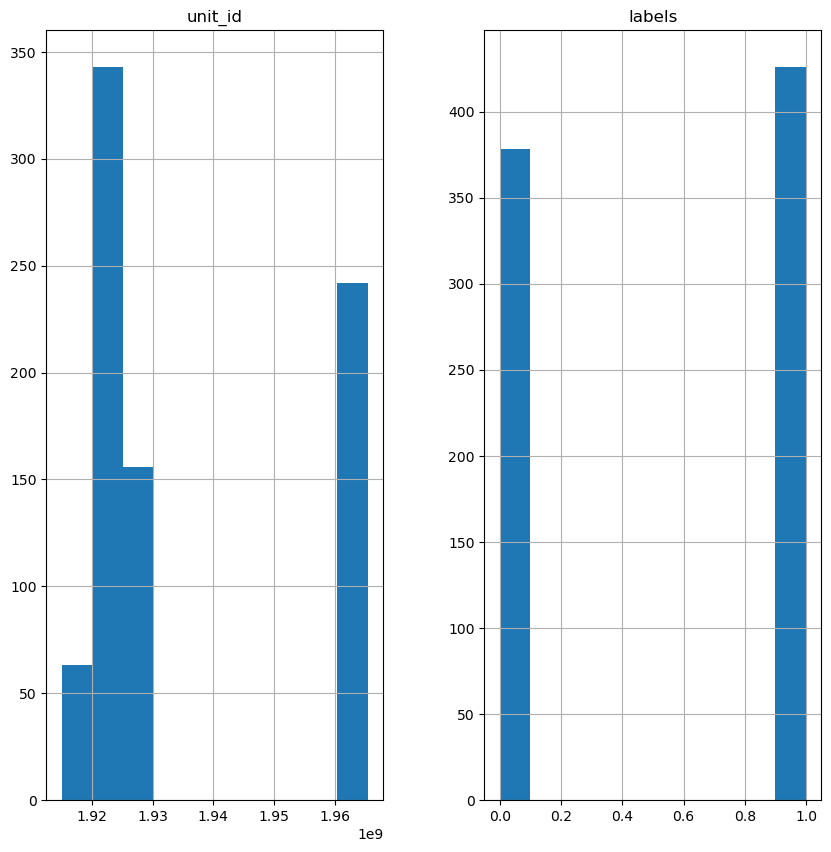

In [6]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
df.hist(figsize=(10, 10))
plt.show()

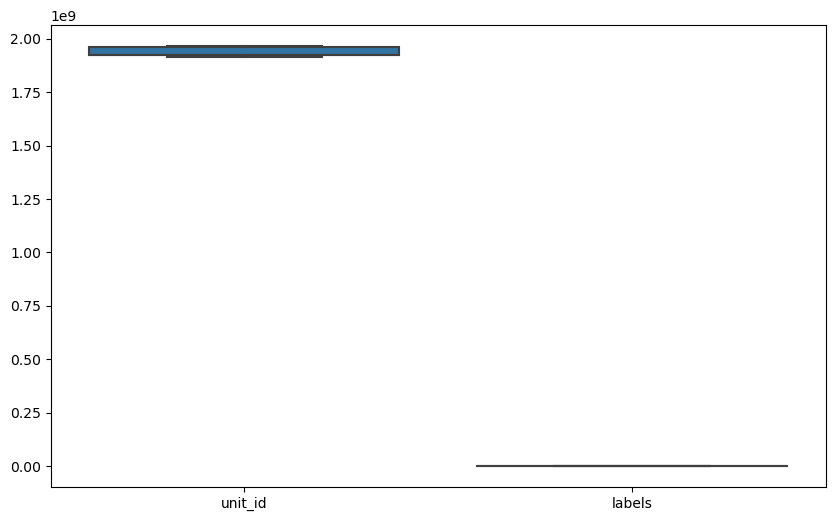

In [7]:
# Box plot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


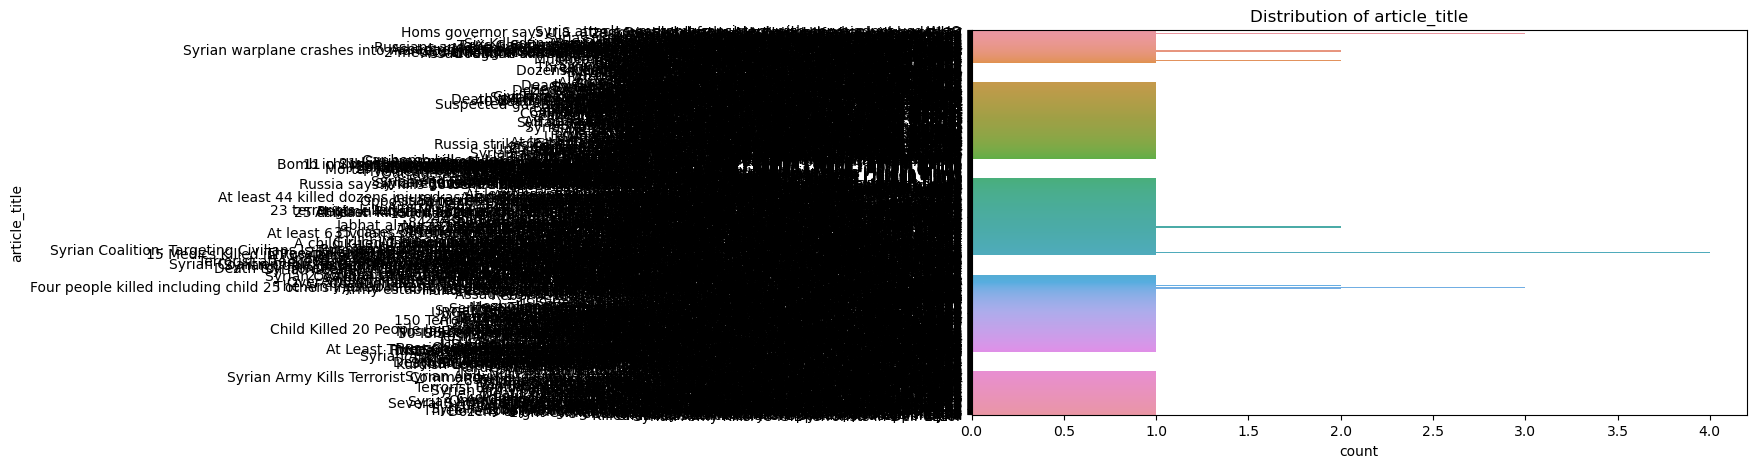

c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 149 (\x95) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Student\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


RuntimeError: In draw_glyphs_to_bitmap: Could not convert glyph to bitmap (error code 0x62)

<Figure size 1000x500 with 1 Axes>

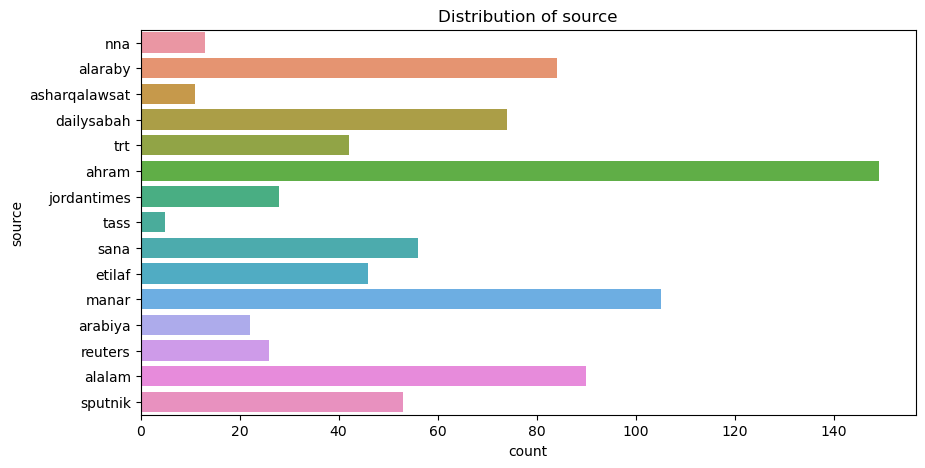

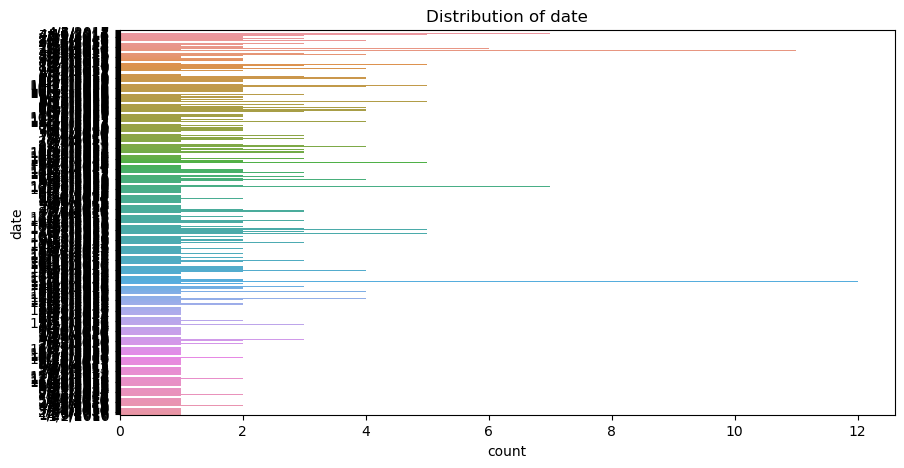

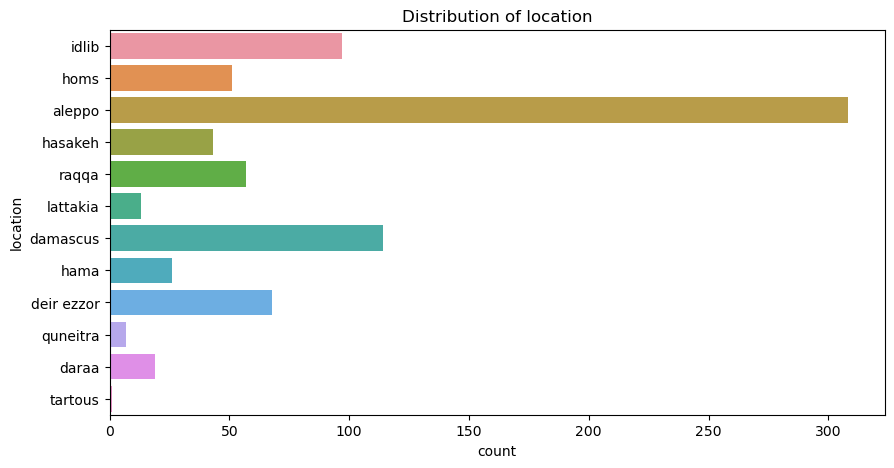

In [8]:
# Count plots for categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [13]:
df_1 = df.dropna()

In [14]:
df_1

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1


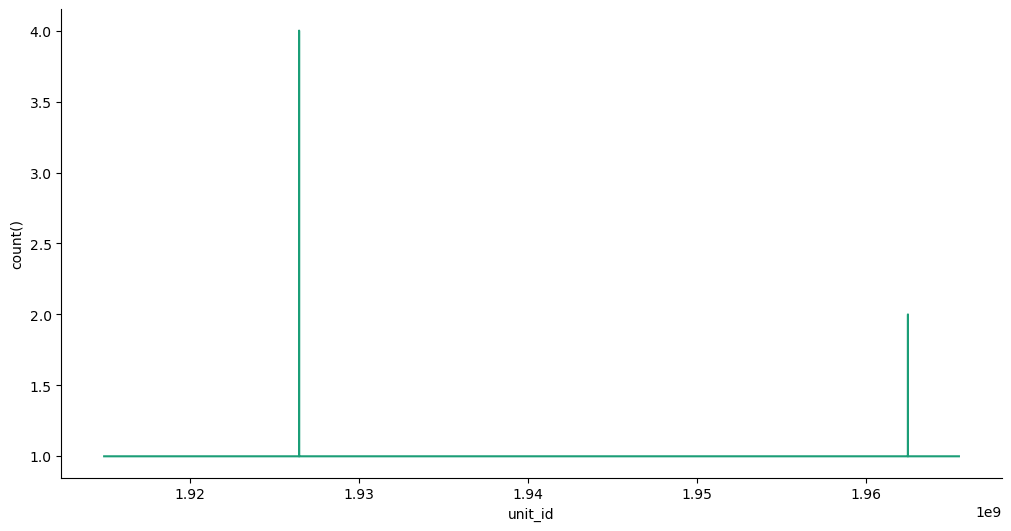

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['unit_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'unit_id'}, axis=1)
              .sort_values('unit_id', ascending=True))
  xs = counted['unit_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_1.sort_values('unit_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('unit_id')
_ = plt.ylabel('count()')

In [17]:
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [18]:
df.tail()

,unit_id,article_title,article_content,source,date,location,labels
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,8/28/2016,aleppo,1
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,8/1/2016,aleppo,1
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,8/3/2016,aleppo,0
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,8/1/2016,idlib,1
803,1965511231,Syrian Army Kills 48 ISIL Terrorists in Deir E...,April 6 2017 Syrian Army Kills 48 ISIL Terrori...,manar,4/4/2017,deir ezzor,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [20]:
df.isnull().sum()

unit_id            0
article_title      0
article_content    0
source             0
date               0
location           0
labels             0
dtype: int64

In [21]:
df.dtypes

unit_id             int64
article_title      object
article_content    object
source             object
date               object
location           object
labels              int64
dtype: object

In [22]:
from scipy import stats

numeric_cols = df1.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df1[numeric_cols]))

# Set a threshold for identifying outliers
threshold = 3
data_no_outliers = df1[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after removing outliers
print("Number of rows before removing outliers:", len(df1))
print("Number of rows after removing outliers:", len(data_no_outliers))

# Step 4: Final Data Overview
print("Data after cleaning and preprocessing:")
print(data_no_outliers.info())
print(data_no_outliers.describe())

Number of rows before removing outliers: 804
Number of rows after removing outliers: 804
Data after cleaning and preprocessing:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 804 entries, 0 to 803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   unit_id          804 non-null    int64 
 1   article_title    804 non-null    object
 2   article_content  804 non-null    object
 3   source           804 non-null    object
 4   date             804 non-null    object
 5   location         804 non-null    object
 6   labels           804 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 50.2+ KB
None
            unit_id      labels
count  8.040000e+02  804.000000
mean   1.936024e+09    0.529851
std    1.876968e+07    0.499419
min    1.914948e+09    0.000000
25%    1.923848e+09    0.000000
50%    1.924058e+09    1.000000
75%    1.962496e+09    1.000000
max    1.965511e+09    1.000000


In [23]:
df['article_title'].mode()

0    6 citizens killed 22 injured in terrorist atta...
Name: article_title, dtype: object

In [24]:
# Convert columns to numeric, forcing errors to NaN
for column in df.select_dtypes(include=['object']).columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [25]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,NaN,NaN,NaN,NaN,NaN,0
1,1914947532,NaN,NaN,NaN,NaN,NaN,0
2,1914947533,NaN,NaN,NaN,NaN,NaN,0
3,1914947534,NaN,NaN,NaN,NaN,NaN,0
4,1914947535,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
799,1965511221,NaN,NaN,NaN,NaN,NaN,1
800,1965511222,NaN,NaN,NaN,NaN,NaN,1
801,1965511224,NaN,NaN,NaN,NaN,NaN,0
802,1965511226,NaN,NaN,NaN,NaN,NaN,1


In [26]:
df.fillna(df.mean(), inplace=True)

In [27]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,NaN,NaN,NaN,NaN,NaN,0
1,1914947532,NaN,NaN,NaN,NaN,NaN,0
2,1914947533,NaN,NaN,NaN,NaN,NaN,0
3,1914947534,NaN,NaN,NaN,NaN,NaN,0
4,1914947535,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
799,1965511221,NaN,NaN,NaN,NaN,NaN,1
800,1965511222,NaN,NaN,NaN,NaN,NaN,1
801,1965511224,NaN,NaN,NaN,NaN,NaN,0
802,1965511226,NaN,NaN,NaN,NaN,NaN,1


In [28]:
print(df.isnull().sum())

unit_id              0
article_title      804
article_content    804
source             804
date               804
location           804
labels               0
dtype: int64


In [29]:
for column in df.select_dtypes(include=['category', 'object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [30]:
df

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,NaN,NaN,NaN,NaN,NaN,0
1,1914947532,NaN,NaN,NaN,NaN,NaN,0
2,1914947533,NaN,NaN,NaN,NaN,NaN,0
3,1914947534,NaN,NaN,NaN,NaN,NaN,0
4,1914947535,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
799,1965511221,NaN,NaN,NaN,NaN,NaN,1
800,1965511222,NaN,NaN,NaN,NaN,NaN,1
801,1965511224,NaN,NaN,NaN,NaN,NaN,0
802,1965511226,NaN,NaN,NaN,NaN,NaN,1


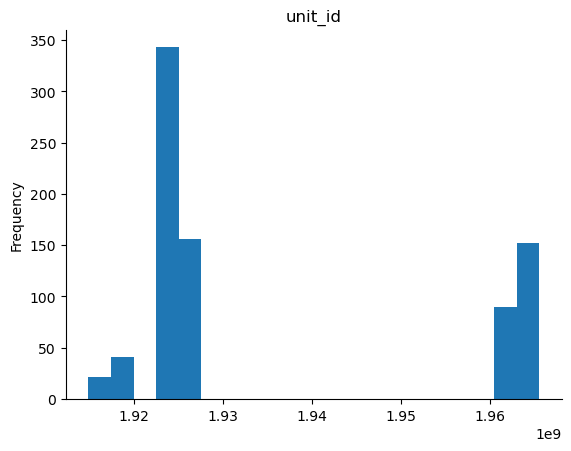

In [31]:
from matplotlib import pyplot as plt
df['unit_id'].plot(kind='hist', bins=20, title='unit_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
X = df.drop('labels', axis=1)  # Replace 'target_column' with your target variable
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,unit_id,article_title,article_content,source,date,location
344,1924058123,NaN,NaN,NaN,NaN,NaN
350,1924058140,NaN,NaN,NaN,NaN,NaN
443,1926479006,NaN,NaN,NaN,NaN,NaN
331,1924058100,NaN,NaN,NaN,NaN,NaN
290,1924058039,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
71,1923102846,NaN,NaN,NaN,NaN,NaN
106,1923102921,NaN,NaN,NaN,NaN,NaN
270,1923848305,NaN,NaN,NaN,NaN,NaN
435,1926478977,NaN,NaN,NaN,NaN,NaN


In [34]:
X_test

,unit_id,article_title,article_content,source,date,location
192,1923848203,NaN,NaN,NaN,NaN,NaN
717,1965511119,NaN,NaN,NaN,NaN,NaN
168,1923848176,NaN,NaN,NaN,NaN,NaN
522,1926479226,NaN,NaN,NaN,NaN,NaN
536,1926479289,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
658,1965495331,NaN,NaN,NaN,NaN,NaN
356,1924058146,NaN,NaN,NaN,NaN,NaN
525,1926479240,NaN,NaN,NaN,NaN,NaN
748,1965511161,NaN,NaN,NaN,NaN,NaN


In [35]:
y_train

344    1
350    0
443    0
331    1
290    1
      ..
71     1
106    1
270    0
435    1
102    0
Name: labels, Length: 643, dtype: int64

In [36]:
y_test

192    1
717    1
168    1
522    0
536    1
      ..
658    0
356    0
525    0
748    0
517    0
Name: labels, Length: 161, dtype: int64

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Student\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [38]:
X_train

array([[-0.63084639,         nan,         nan,         nan,         nan,
                nan],
       [-0.63084548,         nan,         nan,         nan,         nan,
                nan],
       [-0.50122732,         nan,         nan,         nan,         nan,
                nan],
       ...,
       [-0.64208048,         nan,         nan,         nan,         nan,
                nan],
       [-0.50122887,         nan,         nan,         nan,         nan,
                nan],
       [-0.68199031,         nan,         nan,         nan,         nan,
                nan]])

In [39]:
X_test

array([[-0.64208594,         nan,         nan,         nan,         nan,
                nan],
       [ 1.58863267,         nan,         nan,         nan,         nan,
                nan],
       [-0.64208739,         nan,         nan,         nan,         nan,
                nan],
       [-0.50121554,         nan,         nan,         nan,         nan,
                nan],
       [-0.50121216,         nan,         nan,         nan,         nan,
                nan],
       [ 1.58863749,         nan,         nan,         nan,         nan,
                nan],
       [ 1.58778997,         nan,         nan,         nan,         nan,
                nan],
       [-0.63084789,         nan,         nan,         nan,         nan,
                nan],
       [-0.64208386,         nan,         nan,         nan,         nan,
                nan],
       [ 1.58778767,         nan,         nan,         nan,         nan,
                nan],
       [-0.68199497,         nan,         nan,    

In [40]:
from sklearn.ensemble import RandomForestClassifier

m1 = RandomForestClassifier(random_state=42)
##model.fit(X_train, y_train)

In [41]:
m1

RandomForestClassifier(random_state=42)

In [42]:
from sklearn.svm import SVC

# Create an SVM classifier
m2 = SVC(kernel='linear', C=1.0, random_state=42)

In [43]:
m2

SVC(kernel='linear', random_state=42)

In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all features for better accuracy
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
m1 = RandomForestClassifier(n_estimators=100, random_state=42)
m2 = SVC(kernel='linear', C=1.0, probability=True, random_state=42)  # Enable probability estimates for SVC
m3 = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Add a Gradient Boosting model

# Create the Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('rfc', m1), ('svm', m2), ('gbc', m3)],  # Include the new model
    final_estimator=AdaBoostClassifier(n_estimators=50, random_state=42)
)

# Fit the stacking model on the training data
stack_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = stack_model.predict(X_test)

# Evaluate and print the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Stacking Classifier:", accuracy)

Accuracy of Stacking Classifier: 1.0


In [45]:
stack_model

StackingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('gbc',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=AdaBoostClassifier(random_state=42))

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose 'median', 'most_frequent', or a constant value

# Create a pipeline that first imputes missing values, then applies your stacked model
pipeline = Pipeline([
    ('imputer', imputer),
    ('stacked_model', stack_model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('stacked_model',
                 StackingClassifier(estimators=[('rfc',
                                                 RandomForestClassifier(random_state=42)),
                                                ('svm',
                                                 SVC(kernel='linear',
                                                     probability=True,
                                                     random_state=42)),
                                                ('gbc',
                                                 GradientBoostingClassifier(random_state=42))],
                                    final_estimator=AdaBoostClassifier(random_state=42)))])

In [47]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Assume X_train, X_test, y_train, y_test are already defined as numpy arrays

# Custom transformer to remove columns with all NaN values
class AllNanRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, ~np.all(np.isnan(X), axis=0)]

# Create preprocessor
preprocessor = Pipeline([
    ('remove_nan_cols', AllNanRemover()),
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create our base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create the stacking model
stacking_model = VotingClassifier(
    estimators=[('rf', rf), ('ada', ada)],
    voting='soft'
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking_model', stacking_model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Now you can make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [48]:
import pickle as pk

# Load the dataset
#$url = 'https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/26096157/3c4c7ff1-9a0c-4658-a514-b941cba6085e/FA-KES-Dataset.csv'
#data = pd.read_csv(url)

# Save the DataFrame as a pickle file
df.to_pickle('FA-KES-Dataset.pkl')

print("Pickle file created successfully.")

Pickle file created successfully.
